# Regresión

Autores:
- Sergio de la Cruz
- Pablo Ramiro Foronda
- Luciano Pereyra

# Enunciado

En esta práctica, se os proporcionará un conjunto de datos con características de automóviles de segunda mano en distintos países. El objetivo es preprocesar los datos y construir un modelo capaz de predecir los precios de coches que nunca haya visto.

Además, se llevará a cabo una **competición** en kaggle, podéis inscribiros en este siguiente [enlace](https://www.kaggle.com/t/95194d38b1f9447fa9e3b51b8e9d575f)




La estructura del proyecto debe ser la siguiente:

- Carga y limpieza de los datos
- Visualización
- Preprocesamiento
- Pruebas de modelos (razonar sobre los resultados)
- Conclusiones
- Creación de submission



Se valorarán:

- Número y variedad de experimentos con sus conclusiones.
- Calidad del preprocesamiento (y su razonamiento).
- Capacidad de generalización del modelo final.
- Trabajo en equipo (en grupos de más de 1 integrante, claro).
- Creatividad en la solución.
- Claridad del .ipynb presentado en Moodle

# Carga y limpieza de los datos


Aunque se permite la carga de los datos de forma local, se recomienda emplear las siguientes URLs de gist por comodidad:

In [154]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import re

In [155]:
train_url = "https://gist.githubusercontent.com/w-dan/9c2f9a30d0517c58a08d5a7ef42ef2dd/raw/ee85f61926c9aeae5863369a13bb67e182a702ba/training.csv"
test_url = "https://gist.githubusercontent.com/w-dan/9c2f9a30d0517c58a08d5a7ef42ef2dd/raw/ee85f61926c9aeae5863369a13bb67e182a702ba/test.csv"

In [156]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [157]:
pd.set_option('display.max_columns', None)

In [158]:
train_df.head(30)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Chevrolet Spark 1.0 LT,2011,130000,68519,Petrol,Dealer,Manual,First Owner,16.2 kmpl,995 CC,62.1 bhp,90.3Nm@ 4200rpm,5.0
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,1050000,70000,Diesel,Dealer,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
2,3,Mahindra Scorpio S10 7 Seater,2016,1100000,60000,Diesel,Individual,Manual,First Owner,15.4 kmpl,2179 CC,120 bhp,280Nm@ 1800-2800rpm,7.0
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,350000,10000,Petrol,Individual,Manual,Second Owner,20.3 kmpl,998 CC,68.05 bhp,94.14Nm@ 3500rpm,5.0
4,5,Maruti Swift Dzire VDI,2014,490000,50000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5,6,Ford Figo Diesel Titanium,2011,180000,125000,Diesel,Individual,Manual,Second Owner,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0
6,7,Hyundai i10 Sportz Option,2009,199000,70000,Petrol,Individual,Manual,Second Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
7,8,Datsun RediGO T,2017,270000,31100,Petrol,Dealer,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,72Nm@ 4386rpm,5.0
8,9,Nissan Terrano XV 110 PS,2014,525000,120000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.5 bhp,248Nm@ 2250rpm,5.0
9,10,Maruti Alto LXi,2011,200000,73000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [159]:
train_df[train_df.isna().any(axis=1)]

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
39,40,Hyundai Santro Xing GL CNG,2007,127000,137000,CNG,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
136,137,Maruti Swift VDI BSIV,2010,350000,166000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
195,196,Ford Figo Aspire Facelift,2018,624000,14681,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
198,199,Maruti Swift 1.3 VXi,2009,220000,25000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
270,271,BMW 5 Series 520d Sedan,2008,890000,70000,Diesel,Individual,Automatic,Third Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,6766,Hyundai Santro Xing XG,2004,85000,80000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
6774,6775,Maruti Omni E 8 Str STD,2011,190000,70000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
6860,6861,Hyundai Santro Xing ABS,2007,100000,70000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
6881,6882,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN


In [160]:
test_df.shape

(813, 13)

In [161]:
test_df[test_df.isna().any(axis=1)]

,id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
39,40,Hyundai Santro Xing GL CNG,2007,137000,CNG,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
136,137,Maruti Swift VDI BSIV,2010,166000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
195,196,Ford Figo Aspire Facelift,2018,14681,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
198,199,Maruti Swift 1.3 VXi,2009,25000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
270,271,BMW 5 Series 520d Sedan,2008,70000,Diesel,Individual,Automatic,Third Owner,NaN,NaN,NaN,NaN,NaN
374,375,Mahindra Bolero GLX,2004,80000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
415,416,Maruti Estilo LXI,2010,132000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
426,427,Hyundai Santro Xing XG,2006,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
516,517,Hyundai Santro LP zipPlus,2003,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
538,539,Mahindra Bolero LX,2006,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


# Visualización

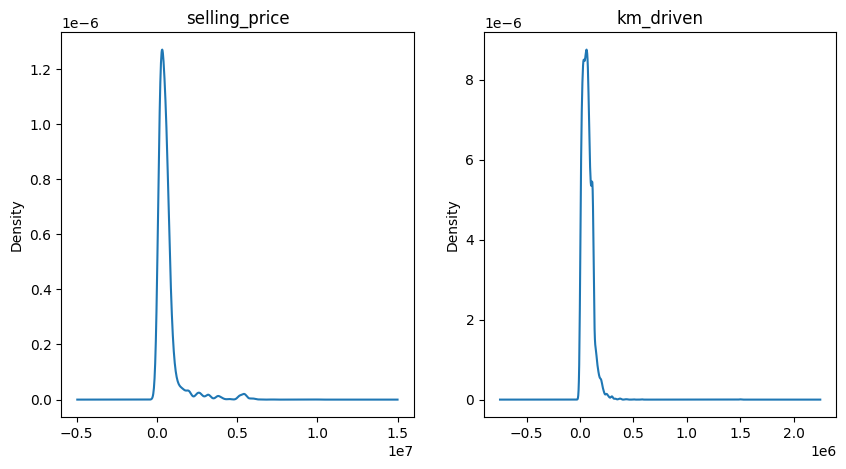

In [162]:


columnas_con= ['selling_price', 'km_driven']

fig, axs = plt.subplots(nrows=1, ncols=len(columnas_con), figsize=(10,5))
i=0
for column in columnas_con:
    axs[i].set_title(column)
    train_df[column].plot.kde(ax=axs[i])
    i+=1
    


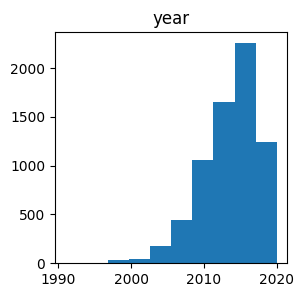

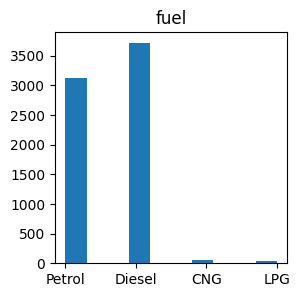

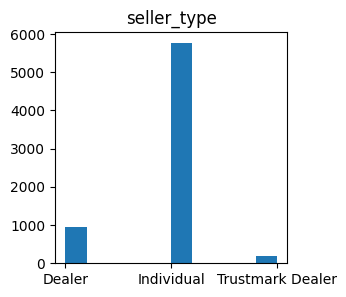

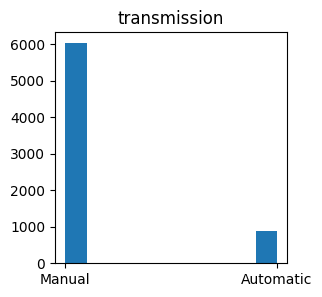

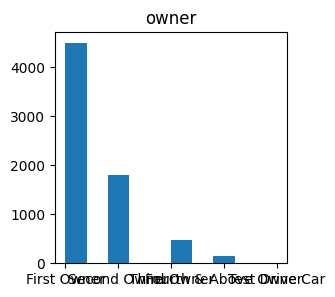

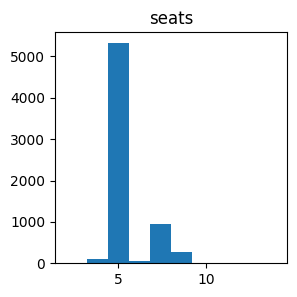

In [163]:

columnas_disc= ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

i=0
for column in columnas_disc:
    fig, axs = plt.subplots(nrows=1, figsize=(3,3))
    plt.title(column)
    plt.hist(train_df[column])
    i+=1
# axs[1].set_title('StandardScaler')
# transformed_df = pd.DataFrame(StandardScaler().fit_transform(train_df[columnas_buscadas]))
# transformed_df.plot.kde(ax=axs[1], legend=False)

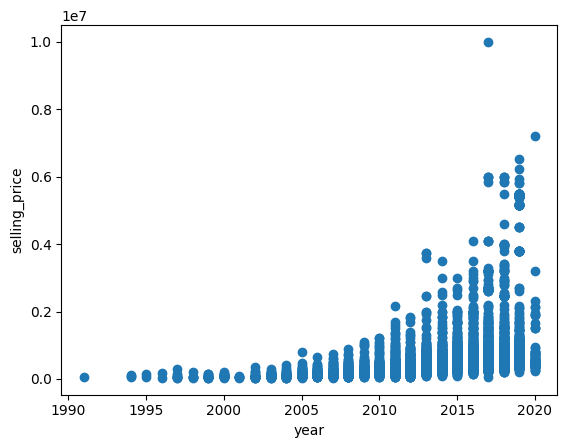

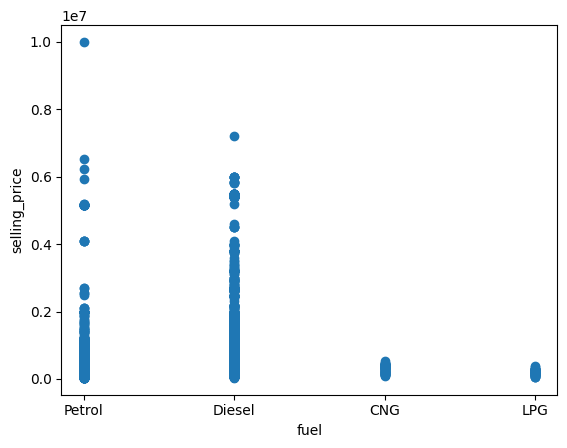

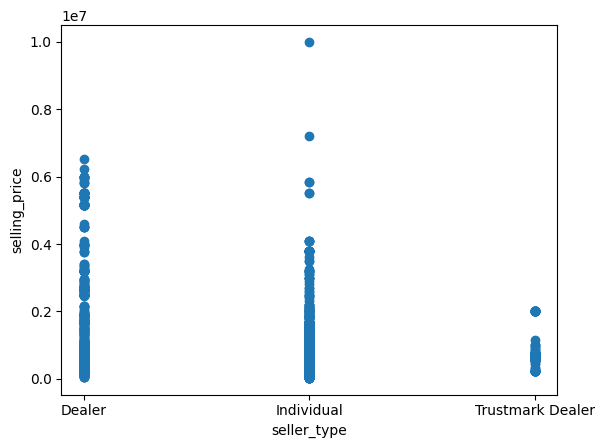

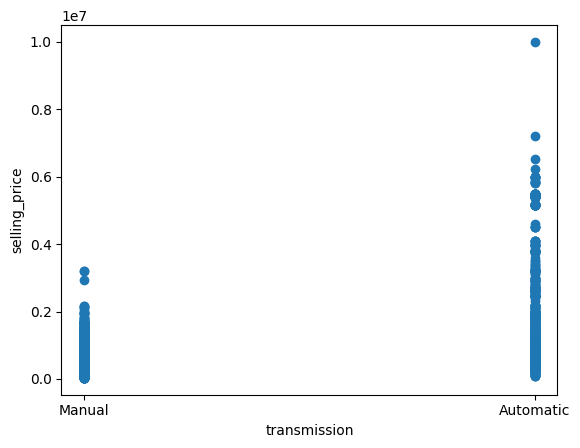

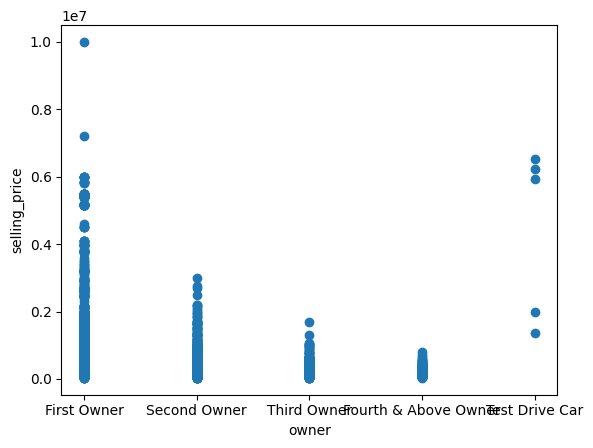

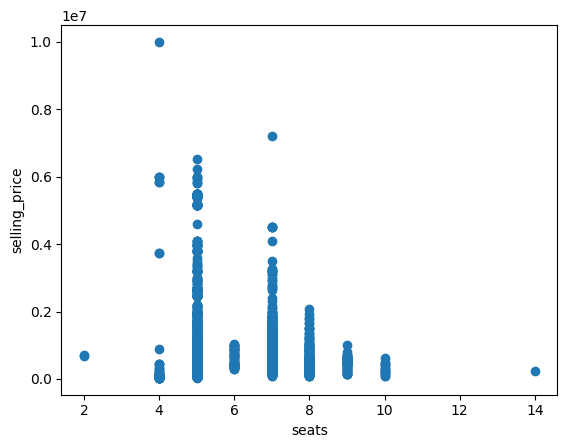

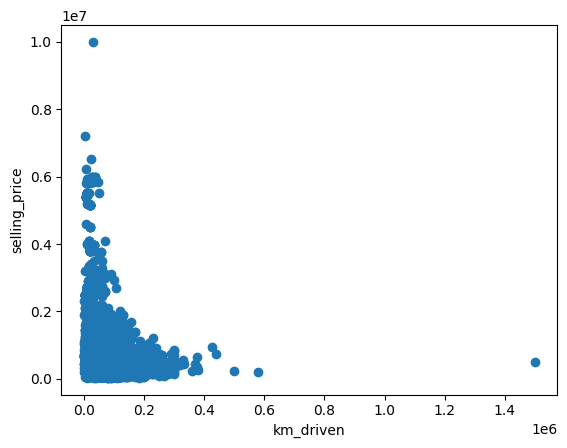

In [164]:
columnas_disc.append('km_driven')
for col in columnas_disc:# Crear la gráfica de puntos
    plt.scatter(train_df[col],train_df['selling_price'])

    # Agregar etiquetas y título
    plt.xlabel(col)
    plt.ylabel('selling_price')
    # Mostrar la gráfica
    plt.show()

In [165]:
# for col in ['marca', 'RPM']:# Crear la gráfica de puntos
#     plt.scatter(train_df[col],train_df['selling_price'])

#     # Agregar etiquetas y título
#     plt.xlabel(col)
#     plt.ylabel('selling_price')
#     # Mostrar la gráfica
#     plt.show()

# Preprocesamiento

In [166]:
def applytorque(row):
    print(row)
    return re.findall(r"-?(\d+(\.?\d+))", str(row))[0][0]
    
def onehot_encode(train_df, columns_to_encode):
    # columns_to_encode = ['fuel', 'seller_type', 'owner', 'marca', 'transmission']
    for column in columns_to_encode:
        encoder = OneHotEncoder()
        encoded = encoder.fit_transform(train_df[[column]])
        encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out([column]))
        encoded_df = encoded_df.astype(int)
        train_df = pd.concat([train_df, encoded_df], axis=1)
    return train_df
    # train_df[['engine','RPM','transmission', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']] =train_df[['engine','RPM','transmission_encode', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']].astype(int)
    
def ordinal_encode(train_df, columns_to_encode, encode):
    if encode == None:
            encoder = OrdinalEncoder()
    for column in columns_to_encode:
        if encode != None:
            cat = encode.get(column)
            encoder = OrdinalEncoder(categories=[cat])
        train_df[column+'_encode'] = encoder.fit_transform(train_df[[column]])
        train_df[column+'_encode'] = train_df[column+'_encode'].astype(int)
    return train_df
    # train_df[['engine','RPM','transmission', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']] =train_df[['engine','RPM','transmission_encode', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']].astype(int)
    

def preproceso(train_df, encode):
    # Eliminamos los datos nulos (al revisarlo solo existe una fila con datos nulos)
    train_df = train_df.dropna().reset_index(drop=True)

    # Obtenemos la primera palabra del nombre del coche para obtener un dato dicreto limitado sobre la marca del coche
    train_df['marca'] = train_df['name'].str.split().str[0]
    # palabras_clave = ['Plus','BSIV','CRDi', 'Swift','VXI', 'Alto', 'Dzire','VDI','LXI','AT','Wagon','VX','Sportz','BSIII','SX','Option','Seater','Innova','Magna','Verna','TDI']
    palabras_clave = ['Plus','BSIV','CRDi', 'VXI','Option', 'BSIII', 'Wagon']
    for w in palabras_clave:
        train_df[w] = train_df['name'].apply(lambda x: 1 if w in x.split() else 0)
    train_df['model_number'] = train_df.name.str.extract(r"([0-9]+\.[0-9]?)").fillna(0).astype(float)

    # Eliminamos las medidas para hacer numericos los campos implicados (asegurandonos que todas las filas tengan la misma medida)
    train_df['engine'] = train_df['engine'].str.split().str[0]
    train_df['max_power'] = train_df['max_power'].str.split().str[0]
    train_df['mileage'] = train_df['mileage'].str.split().str[0]
    # Para la columna torque se pueden obtener el torque en Nm y las Revoluciones Por Minuto, separamos los datos en campos distintos y para el RPM elegimos el valor mas alto si hay un intervalo 
    regex = train_df.torque.str.findall(r"-?(\d+(\.?\d+))")
    train_df['torque'] = [i[0][0] for i in regex]
    train_df['RPM'] = [i[-1][0] for i in regex]

    columns_to_encode = ['fuel', 'seller_type', 'owner','marca', 'transmission']
    # train_df = ordinal_encode(train_df, ['marca','marca_modelo'], encode)
    train_df = onehot_encode(train_df, columns_to_encode)
    # Transformamos en numéricos los datos dicretos (si solo tienen 2 valores OneHotEncoder por velocidad, sino OrdinalEncoder)
    # encode = {}
    # for column in columns_to_encode:
    #     print(train_df[column].drop_duplicates())
        # encode[column] = train_df[[column,column+'_encode']].drop_duplicates().sort_values(column+'_encode')[column].to_list()
    # columns_to_encode.append('marca')
    # columns_to_encode.append('marca_modelo')
    # columns_to_encode.append('name')
    # columns_to_encode.append('id')
    train_df.drop(columns_to_encode,axis=1, inplace=True)
    train_df[['mileage','max_power','torque', 'RPM', 'engine']] = train_df[['mileage','max_power','torque', 'RPM', 'engine']].astype(float)
    # train_df = train_df.drop(columns='transmission')

    return train_df, encode



Eliminamos los datos nulos (al revisarlo solo existe una fila con datos nulos)

Obtenemos la primera palabara del nombre del coche para obtener un dato dicreto limitado sobre la marca del coche
Ademas de eso buscamos las palabras que más aparecen en la columna 'name' y creamos un campo para cada una que que diga si esa palabra esta o no en el 'name' 

Eliminamos las medidas para hacer numericos los campos implicados (asegurandonos que todas las filas tengan la misma medida)

Para la columna torque se pueden obtener el torque en Nm y las Revoluciones Por Minuto, separamos los datos en campos distintos y para el RPM elegimos el valor mas alto si hay un intervalo 

Transformamos en numéricos los datos dicretos, tenemos a opcion de onehot_encoder y ordinal_encoder
Onehot produce muchos campos nuevos y aumenta enormemente el tamaño del df y al hacer pruebas se ve que tarda mas en procesar la regression que Ordinal_encoder, pero como hemos obtenido mejores resultados con onehot (seguramente debido a el problema con los pesos al asignar valores numericos distintos)
Por lo que usamos onehot

In [167]:
def agrupar_palabras(df, columna):
    
    palabras_frases = []
    
    # Iterar sobre cada fila del DataFrame
    for indice, fila in df.iterrows():
        # Obtener la frase de la columna especificada
        frase = fila[columna]
        
        # Dividir la frase en palabras
        palabras = frase.split()
        
        # Iterar sobre cada palabra y agregarla al diccionario junto con la frase correspondiente
        for palabra in palabras:
            palabras_frases.append(palabra)
    
    return palabras_frases


# Llamar a la función y mostrar el resultado
train_df['marca'] = train_df['name'].str.split().str[0]
resultado = agrupar_palabras(train_df, 'name')
cont=[]
print(len(resultado))
print(len(set(resultado)))
for i in set(resultado):
    if i not in train_df.marca.values:
        cont.append([i, resultado.count(i)])
cont.sort(reverse=True,key=lambda x: x[1])
cont

32694
902


[['Swift', 649],
 ['BSIV', 603],
 ['1.2', 506],
 ['Diesel', 455],
 ['Plus', 451],
 ['VXI', 408],
 ['Alto', 361],
 ['CRDi', 347],
 ['Dzire', 317],
 ['i20', 308],
 ['VDI', 300],
 ['LXI', 289],
 ['i10', 284],
 ['1.5', 258],
 ['AT', 254],
 ['1.4', 252],
 ['1.6', 243],
 ['R', 238],
 ['Wagon', 238],
 ['VX', 232],
 ['Sportz', 226],
 ['BSIII', 225],
 ['SX', 218],
 ['Option', 214],
 ['BS', 212],
 ['Seater', 209],
 ['800', 202],
 ['Innova', 202],
 ['2.5', 193],
 ['Magna', 189],
 ['S', 178],
 ['Verna', 173],
 ['TDI', 172],
 ['LX', 171],
 ['IV', 170],
 ['Bolero', 170],
 ['MT', 168],
 ['Grand', 166],
 ['Titanium', 165],
 ['Asta', 163],
 ['City', 152],
 ['Figo', 151],
 ['1.3', 139],
 ['AMT', 138],
 ['7', 138],
 ['Scorpio', 135],
 ['Optional', 133],
 ['V', 133],
 ['Ertiga', 132],
 ['Indica', 130],
 ['AC', 127],
 ['(Diesel)', 126],
 ['LS', 122],
 ['ZXI', 118],
 ['Indigo', 117],
 ['EON', 117],
 ['XUV500', 115],
 ['Santro', 115],
 ['1.0', 110],
 ['2WD', 103],
 ['Petrol', 102],
 ['Etios', 102],
 ['VDi', 

Aqui es donde buscamos cuanto aparece cada palabra en 'name'

In [168]:
train_df, encode = preproceso(train_df,None)

In [169]:
# train_df[train_df.name.str.contains('City')]
# train_df[train_df.name.str.contains('i20')]
train_df#[['name','model_number']].head(40)


,id,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,Plus,BSIV,CRDi,VXI,Option,BSIII,Wagon,model_number,RPM,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,marca_Ambassador,marca_Ashok,marca_Audi,marca_BMW,marca_Chevrolet,marca_Daewoo,marca_Datsun,marca_Fiat,marca_Force,marca_Ford,marca_Honda,marca_Hyundai,marca_Isuzu,marca_Jaguar,marca_Jeep,marca_Kia,marca_Land,marca_Lexus,marca_MG,marca_Mahindra,marca_Maruti,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Opel,marca_Renault,marca_Skoda,marca_Tata,marca_Toyota,marca_Volkswagen,marca_Volvo,transmission_Automatic,transmission_Manual
0,1,Chevrolet Spark 1.0 LT,2011,130000,68519,16.20,995.0,62.10,90.30,5.0,0,0,0,0,0,0,0,1.0,4200.0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,1050000,70000,22.32,1582.0,126.32,259.80,5.0,0,0,1,0,0,0,0,1.6,2750.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,Mahindra Scorpio S10 7 Seater,2016,1100000,60000,15.40,2179.0,120.00,280.00,7.0,0,0,0,0,0,0,0,0.0,2800.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,350000,10000,20.30,998.0,68.05,94.14,5.0,1,0,0,0,0,0,0,1.0,3500.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,Maruti Swift Dzire VDI,2014,490000,50000,23.40,1248.0,74.00,190.00,5.0,0,0,0,0,0,0,0,0.0,2000.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,6905,Hyundai i20 2015-2017 Asta Option 1.2,2016,650000,29000,18.60,1197.0,81.83,114.70,5.0,0,0,0,0,1,0,0,1.2,4000.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6723,6906,Hyundai EON Sportz,2017,300000,10000,21.10,814.0,55.20,74.50,5.0,0,0,0,0,0,0,0,0.0,4000.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6724,6907,Maruti Swift VDI Optional,2017,693000,58559,25.20,1248.0,74.00,190.00,5.0,0,0,0,0,0,0,0,0.0,2000.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6725,6908,Maruti Baleno Alpha 1.2,2017,580000,20000,21.40,1197.0,83.10,115.00,5.0,0,0,0,0,0,0,0,1.2,4000.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [170]:
encode

In [171]:
train_df.drop(['name','id'],axis=1, inplace=True)

In [172]:
from sklearn.impute import SimpleImputer


test_na = test_df[test_df.isna().any(axis=1)]

test_df, encode_test = preproceso(test_df,encode)


In [173]:
test_df

,id,name,year,km_driven,mileage,engine,max_power,torque,seats,Plus,BSIV,CRDi,VXI,Option,BSIII,Wagon,model_number,RPM,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,marca_Audi,marca_BMW,marca_Chevrolet,marca_Datsun,marca_Fiat,marca_Force,marca_Ford,marca_Honda,marca_Hyundai,marca_Jaguar,marca_Jeep,marca_Lexus,marca_Mahindra,marca_Maruti,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Renault,marca_Skoda,marca_Tata,marca_Toyota,marca_Volkswagen,marca_Volvo,transmission_Automatic,transmission_Manual
0,1,Chevrolet Spark 1.0 LT,2011,68519,16.20,995.0,62.10,90.30,5.0,0,0,0,0,0,0,0,1.0,4200.0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,70000,22.32,1582.0,126.32,259.80,5.0,0,0,1,0,0,0,0,1.6,2750.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,Mahindra Scorpio S10 7 Seater,2016,60000,15.40,2179.0,120.00,280.00,7.0,0,0,0,0,0,0,0,0.0,2800.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,10000,20.30,998.0,68.05,94.14,5.0,1,0,0,0,0,0,0,1.0,3500.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,Maruti Swift Dzire VDI,2014,50000,23.40,1248.0,74.00,190.00,5.0,0,0,0,0,0,0,0,0.0,2000.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,809,Mahindra Xylo E4 BS III,2014,78000,11.68,2498.0,112.00,260.00,7.0,0,0,0,0,0,0,0,0.0,2200.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
788,810,Maruti Swift Dzire VDI,2016,75000,26.59,1248.0,74.00,190.00,5.0,0,0,0,0,0,0,0,0.0,2000.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
789,811,Maruti Swift VXI,2020,5000,21.21,1197.0,81.80,113.00,5.0,0,0,0,1,0,0,0,0.0,4200.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
790,812,Audi Q5 35TDI Premium Plus,2018,31800,17.01,1968.0,188.00,400.00,5.0,1,0,0,0,0,0,0,0.0,3000.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [146]:
encode_test

# Pruebas de modelos

Regresion

C:\Users\sergio.cruz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.401e+13, tolerance: 3.896e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\sergio.cruz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.687e+13, tolerance: 3.928e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\sergio.cruz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

ElasticNet(alpha=10000)
MAE_pred 106295.25516119249


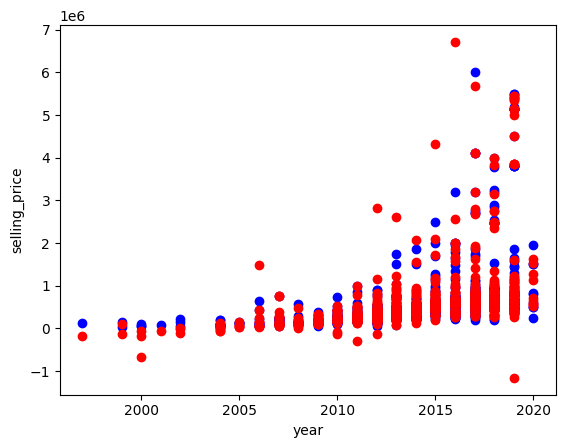

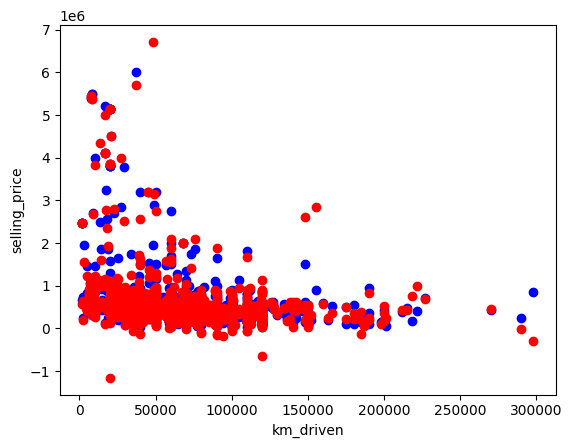

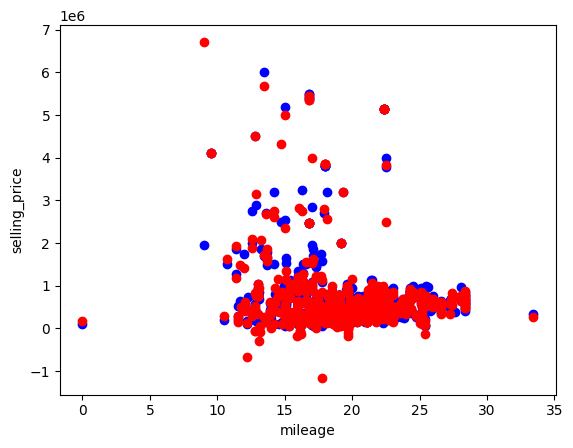

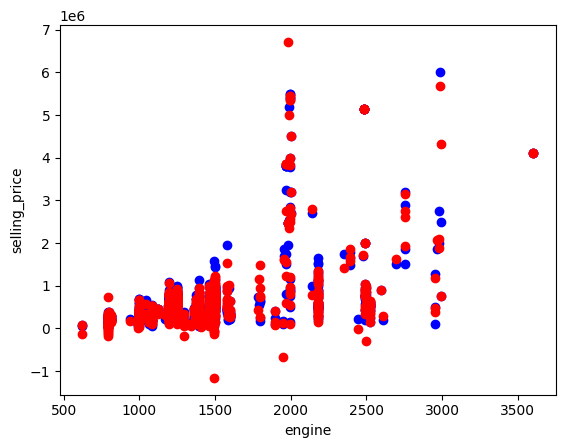

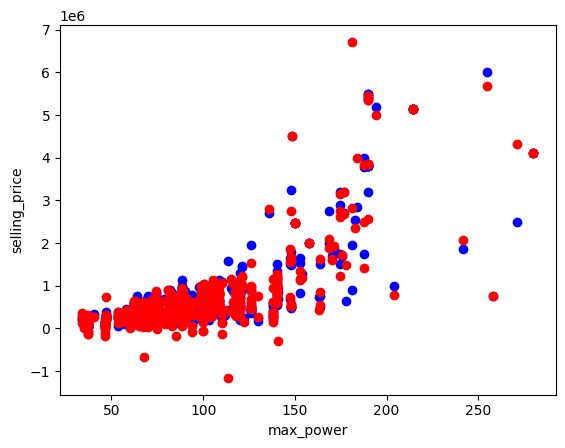

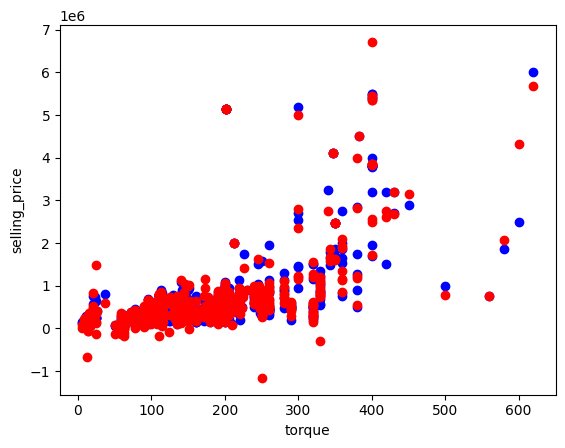

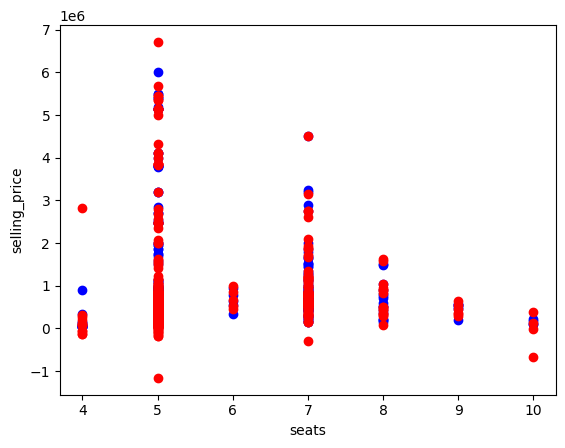

In [147]:
import statistics
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge, ARDRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures


n_fit = 6000

poly = PolynomialFeatures(degree=3)  # Grado del polinomio (puedes ajustarlo)

data_real = train_df['selling_price'][n_fit:]
Regressors = []
# Regressors.append(LinearRegression())
# Regressors.append(ElasticNet())
# # for a in range(1, 500, 100):
# Regressors.append(ElasticNet(alpha=10000, l1_ratio=0.8))
# Regressors.append(ElasticNet(alpha=10000, l1_ratio=0.2))
# Regressors.append(ElasticNet(alpha=50000, l1_ratio=0.8))
# Regressors.append(ElasticNet(alpha=50000, l1_ratio=0.5))
# Regressors.append(ElasticNet(alpha=100000, l1_ratio=0.5))
# Regressors.append(ElasticNet(alpha=200000, l1_ratio=0.5))
# Regressors.append(ElasticNet(alpha=10000, l1_ratio=0.2))
Regressors.append(ElasticNet(alpha=10000, l1_ratio=0.5))
# Regressors.append(ElasticNet(alpha=10000, l1_ratio=0.8))
# Regressors.append(BayesianRidge())
# Regressors.append(Ridge(alpha=50000))
# for i in range(20,50):
# Regressors.append(DecisionTreeRegressor())
# Regressors.append(KNeighborsRegressor(n_neighbors=3))
# Regressors.append(KNeighborsRegressor(n_neighbors=6))
MAE_fit=[]
MAE_pred=[]



for r in Regressors:
    for i in range(5):
        regr = r
        train_df = train_df.sample(frac=1).reset_index(drop=True)
        X_fit = train_df[:n_fit].drop('selling_price', axis=1)
        X_fit = poly.fit_transform(X_fit)
        Y_fit = train_df['selling_price'][:n_fit]
        X_pred = train_df[n_fit:].drop('selling_price', axis=1)
        X_pred = poly.fit_transform(X_pred)
        data_real = train_df['selling_price'][n_fit:]
        data_pred  = regr.fit(X_fit, Y_fit).predict(X_pred)
        # data_pred_fit = regr.fit(X_fit, Y_fit).predict(X_fit)
        # print(mean_absolute_error(data_real, data_pred))
        MAE_pred.append(mean_absolute_error(data_real, data_pred))
        # MAE_fit.append(mean_absolute_error(Y_fit, data_pred_fit))
        # print("MAE: ", mean_absolute_error(data_real, data_pred))
        # print("MSE: ", mean_squared_error(data_real, data_pred))
        # print("RMSE: ", mean_squared_error(data_real, data_pred, squared=False))
    print(regr)
    # print('MAE_fit', statistics.mean(MAE_fit))
    print('MAE_pred', statistics.mean(MAE_pred))
    # print(regr, statistics.stdev(MAE))
    # print(cross_val_score(regr, X_fit, Y_fit, cv=5, scoring='neg_mean_squared_error'))
    # print(regr.coef_)
    for col in ['year', 'km_driven', 'mileage',	'engine',	'max_power',	'torque',	'seats' ]:# Crear la gráfica de puntos
        plt.scatter(train_df[col][n_fit:],data_real, color='b')
        plt.scatter(train_df[col][n_fit:],data_pred, color='r')

        # Agregar etiquetas y título
        plt.xlabel(col) 
        plt.ylabel('selling_price')
        # Mostrar la gráfica
        plt.show()

# Conclusiones

Durante el preproceso se ha buscado sacar variables útiles como 'marca' y/o convertirlas a valores numéricos que se puedan usar.
En la prueba de modelos se han probado varias opciones siendo al principio los valores de error muy altos (alrededor de 200000) y queriamos comprobar si el problema era el modelo utilizado.
Antes de añadir Polynomial features el mejor resultado lo daba DecisionTreeRegressor pero tras ese añaido los mejores resultados los dio ElasticNet, tanto en el MAE como en rendimiento
Realizamos varias pruebas con distintos alpha y l1_ratio y elegimos los valores 10000 y 0. respectivamente. Al principio pensamos en 0.8 (para quitar peso a campos que o tengan tanta relevancia en el dataset, dado que tenemos bastantes vampos) para l1 pero daba mejores resultados si lo bajabamos asi que lo dejamos en 0.5
Comparamos el MAE para predecir con los datos de entreno y con datos nuevos y aunque hay diferencia no creemos que haya un overfitting excesivo

# Creación de *submission* para Kaggle

In [174]:
new_test_na = test_na
new_test_na['torque'] = new_test_na['torque'].fillna('000Nm@ 000rpm')
new_test_na = new_test_na.fillna('0')
new_test_na, encode = preproceso(new_test_na,encode)
for col in ['mileage', 'engine', 'max_power', 'torque', 'seats', 'RPM']:
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')
    median = test_df[col].median()
    new_test_na[col]=median
test_df = pd.concat([new_test_na,test_df],axis=0).sort_values('id').reset_index(drop=True)
test_id=test_df.id

test_df.drop(['id','name'], axis=1, inplace=True)

test_df

,year,km_driven,mileage,engine,max_power,torque,seats,Plus,BSIV,CRDi,VXI,Option,BSIII,Wagon,model_number,RPM,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,owner_First Owner,owner_Second Owner,owner_Third Owner,marca_BMW,marca_Ford,marca_Hyundai,marca_Mahindra,marca_Maruti,marca_Toyota,transmission_Automatic,transmission_Manual,fuel_LPG,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Test Drive Car,marca_Audi,marca_Chevrolet,marca_Datsun,marca_Fiat,marca_Force,marca_Honda,marca_Jaguar,marca_Jeep,marca_Lexus,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Renault,marca_Skoda,marca_Tata,marca_Volkswagen,marca_Volvo
0,2011,68519,16.20,995.0,62.10,90.30,5.0,0,0,0,0,0,0,0,1.0,4200.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,70000,22.32,1582.0,126.32,259.80,5.0,0,0,1,0,0,0,0,1.6,2750.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,60000,15.40,2179.0,120.00,280.00,7.0,0,0,0,0,0,0,0,0.0,2800.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,10000,20.30,998.0,68.05,94.14,5.0,1,0,0,0,0,0,0,1.0,3500.0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,50000,23.40,1248.0,74.00,190.00,5.0,0,0,0,0,0,0,0,0.0,2000.0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2014,78000,11.68,2498.0,112.00,260.00,7.0,0,0,0,0,0,0,0,0.0,2200.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
809,2016,75000,26.59,1248.0,74.00,190.00,5.0,0,0,0,0,0,0,0,0.0,2000.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
810,2020,5000,21.21,1197.0,81.80,113.00,5.0,0,0,0,1,0,0,0,0.0,4200.0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
811,2018,31800,17.01,1968.0,188.00,400.00,5.0,1,0,0,0,0,0,0,0.0,3000.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tenemos el problema de que en test_df hay datos nulos que no deben ser descartados, para ello los rellenamos con valores 0 para que pase el preproceso y luego en los nuevos campos se calcula la mediana de estos campos con los datos que no son nulos

In [175]:
Y = train_df['selling_price']
X = train_df.drop('selling_price',axis=1)
col_comun = list(set(X.columns).intersection(test_df.columns))
print(col_comun)
X=X[col_comun]
test_df=test_df[col_comun]


['marca_Nissan', 'marca_Fiat', 'model_number', 'marca_Toyota', 'year', 'seller_type_Dealer', 'owner_Test Drive Car', 'marca_Chevrolet', 'marca_Mitsubishi', 'torque', 'fuel_Diesel', 'transmission_Manual', 'fuel_Petrol', 'BSIII', 'marca_Jeep', 'transmission_Automatic', 'BSIV', 'seller_type_Individual', 'marca_Maruti', 'marca_Volkswagen', 'owner_Fourth & Above Owner', 'marca_Volvo', 'marca_Datsun', 'max_power', 'marca_Jaguar', 'marca_Mercedes-Benz', 'owner_First Owner', 'marca_Honda', 'CRDi', 'owner_Second Owner', 'marca_Tata', 'marca_Skoda', 'seller_type_Trustmark Dealer', 'Option', 'marca_BMW', 'marca_Force', 'marca_Mahindra', 'fuel_CNG', 'RPM', 'engine', 'fuel_LPG', 'seats', 'marca_Lexus', 'VXI', 'marca_Renault', 'marca_Audi', 'Wagon', 'marca_Ford', 'Plus', 'km_driven', 'owner_Third Owner', 'mileage', 'marca_Hyundai']


Para que pasen por la regresion nos quedamos solo con los campos que aparezcan tanto en train_df como en test_df (dado que si hay una marca de coche que aparece en un df pero en el otro no habra campos distintos)

In [176]:
X = poly.fit_transform(X)
imputer = SimpleImputer(strategy='median')
test_df_imputed = imputer.fit_transform(test_df)

test_df_imputed = poly.fit_transform(test_df_imputed)
data_pred = ElasticNet(alpha=10000, l1_ratio=0.5).fit(X, Y).predict(test_df_imputed)


C:\Users\sergio.cruz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.170e+13, tolerance: 4.268e+11
  model = cd_fast.enet_coordinate_descent(


In [177]:
result = pd.DataFrame(data=test_id.values , columns=['id'])
result['TARGET'] = data_pred
result.to_csv('out.csv', index=False)
result

,id,TARGET
0,1,1.350568e+05
1,2,7.190380e+05
2,3,8.594883e+05
3,4,4.202898e+05
4,5,5.060844e+05
...,...,...
808,809,5.349924e+05
809,810,5.485140e+05
810,811,6.435298e+05
811,812,3.245990e+06


In [178]:
test_new = pd.concat([result, test_df], axis=1)

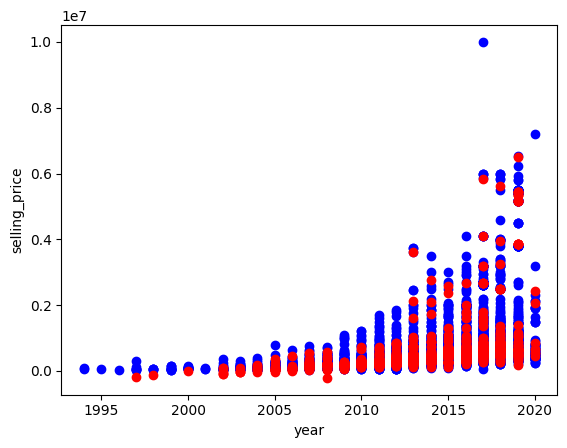

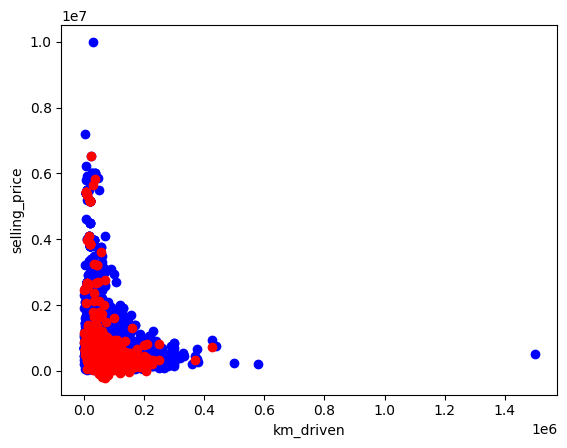

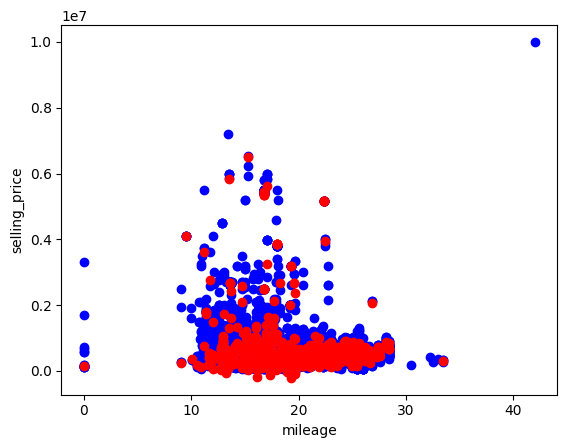

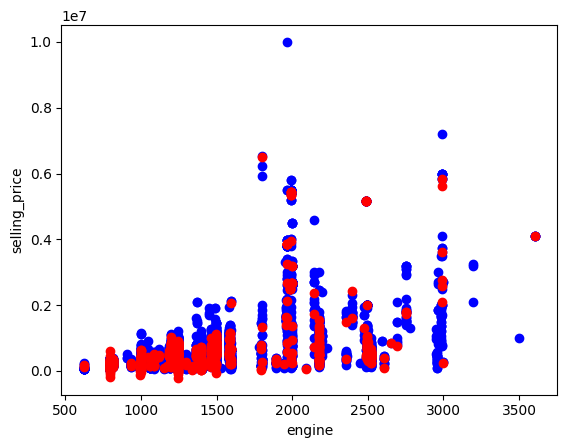

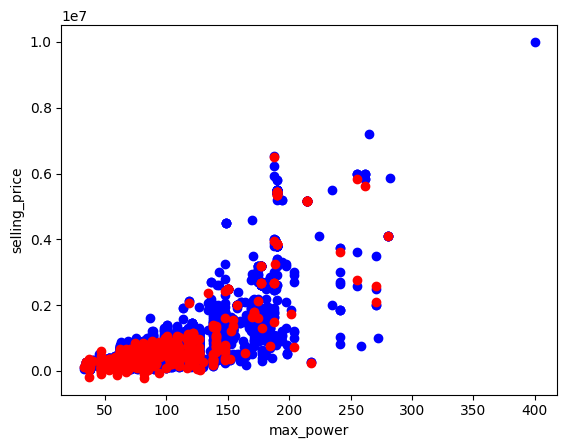

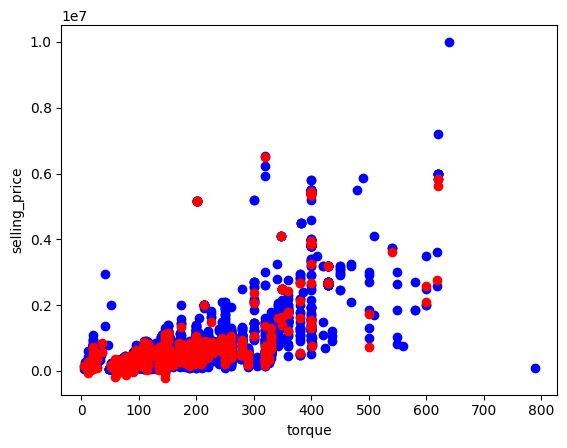

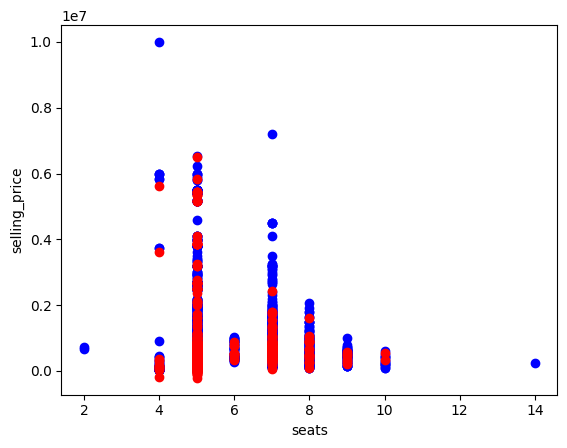

In [179]:
for col in ['year', 'km_driven', 'mileage',	'engine',	'max_power',	'torque',	'seats' ]:# Crear la gráfica de puntos
    plt.scatter(train_df[col],train_df['selling_price'], color='b')
    plt.scatter(test_new[col],test_new['TARGET'], color='r')

    # Agregar etiquetas y título
    plt.xlabel(col) 
    plt.ylabel('selling_price')
    # Mostrar la gráfica
    plt.show()